# Problem Domain

Pada proyek ini, kita akan memprediksi harga rumah di wilayah California menggunakan dataset yang berisi data kuantitatif dan informasi geografis. Prediksi harga rumah merupakan masalah regresi yang penting dalam bidang real estate, karena dapat membantu pembeli, penjual, dan agen properti untuk membuat keputusan yang tepat berdasarkan perkiraan nilai pasar saat ini.

Dataset yang digunakan mencakup berbagai fitur seperti lokasi geografis (longitude dan latitude), usia median rumah, jumlah total ruangan dan kamar tidur, populasi sekitar, pendapatan median, dan kategori kedekatan dengan laut (ocean_proximity). Dataset ini memiliki 20.640 sampel yang memberikan cukup informasi untuk membangun model prediksi harga yang akurat.


# Tujuan Proyek

Tujuan utama dari proyek ini adalah:

1. Melakukan eksplorasi dan pemahaman data secara menyeluruh untuk mengenali pola dan karakteristik dataset.  
2. Menangani missing values dan melakukan persiapan data yang diperlukan agar model machine learning dapat bekerja secara optimal.  
3. Membangun model regresi menggunakan Random Forest untuk memprediksi harga median rumah berdasarkan fitur-fitur yang tersedia.  
4. Mengevaluasi performa model menggunakan metrik Root Mean Squared Error (RMSE) dan R² Score agar model dapat dipercaya dalam memprediksi harga rumah.  
5. Memberikan insight dan interpretasi hasil model untuk mendukung pengambilan keputusan di bidang properti.

Dengan tujuan ini, proyek diharapkan dapat memberikan prediksi harga rumah yang cukup akurat sekaligus memberikan pemahaman lebih dalam terhadap faktor-faktor yang memengaruhi harga rumah.

# Import Libraries dan Load Dataset

In [ ]:
# Cell 1: Import Libraries dan Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('housing.csv')

# Print jumlah sample dan kolom
print(f"Jumlah sample: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
df.head()


Jumlah sample: 20640
Jumlah kolom: 10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Penjelasan Cell 1  
Cell ini digunakan untuk mengimpor semua library yang dibutuhkan, memuat dataset California Housing Prices ke dalam DataFrame `df`,  
dan menampilkan jumlah sample serta kolom pada dataset. Bagian akhir menampilkan 5 baris pertama dataset sebagai preview.


# Preview Data dan Informasi Dasar

In [ ]:
# Cell 2: Preview Data dan Informasi Dasar
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nMissing Values per Kolom:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Statistik Deskriptif:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std       

# Penjelasan Cell 2  
Cell ini menampilkan informasi dasar tentang dataset termasuk tipe data setiap kolom, jumlah nilai non-null, dan ukuran memori yang digunakan.  
Selain itu juga menampilkan statistik deskriptif untuk kolom numerik seperti mean, std, min, max, dan quartiles.  
Terakhir, ditampilkan jumlah nilai yang hilang (missing values) pada setiap kolom.


# Mengisi Missing Values dengan Median

In [ ]:
# Cell 3: Mengisi Missing Values dengan Median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

print("Missing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<ipython-input-3-136ef2eb7494>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


# Penjelasan Cell 3  
Cell ini menangani missing values pada kolom `total_bedrooms` dengan mengganti nilai yang hilang menggunakan nilai median kolom tersebut.  
Setelah imputasi, dicek kembali apakah masih ada missing values.


# Visualisasi Distribusi Variabel Numerik

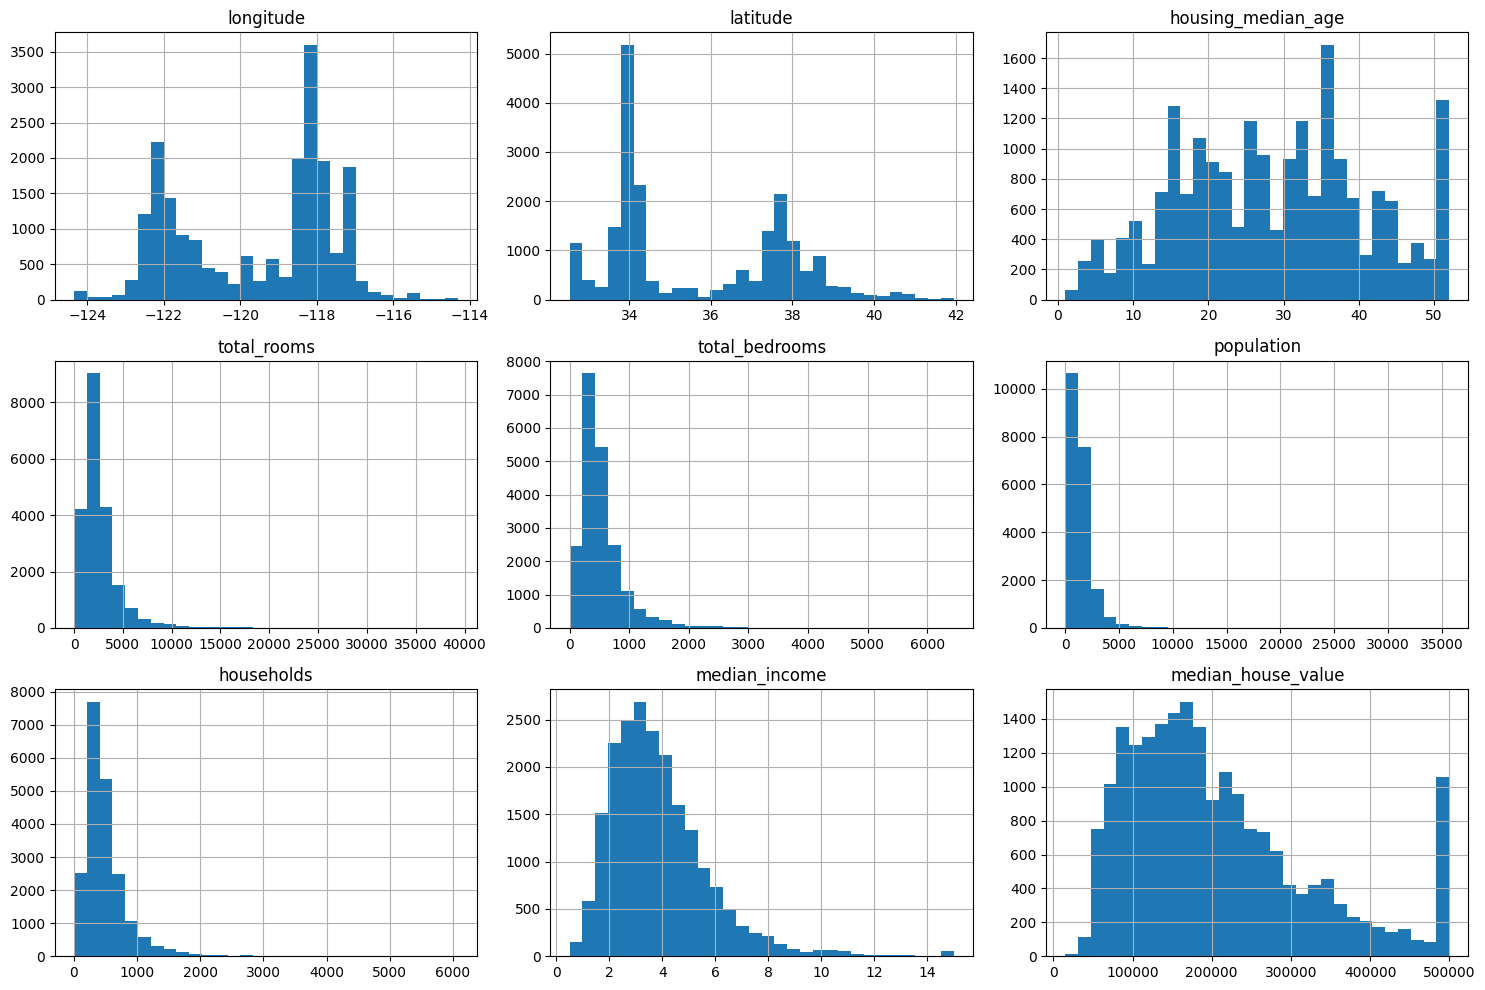

In [ ]:
# Cell 4: Visualisasi Distribusi Variabel Numerik
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


# Penjelasan Cell 4  
Visualisasi distribusi dari semua fitur numerik menggunakan histogram.  
Hal ini membantu memahami sebaran data, apakah normal, skewed, atau ada outlier.


# Visualisasi Kategori Ocean Proximity

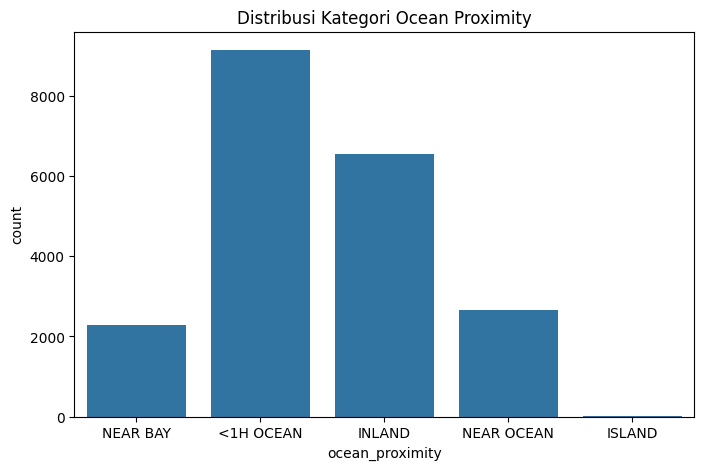

In [ ]:
# Cell 5: Visualisasi Kategori Ocean Proximity
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ocean_proximity')
plt.title("Distribusi Kategori Ocean Proximity")
plt.show()


# Penjelasan Cell 5  
Visualisasi jumlah sample untuk setiap kategori pada fitur kategorikal `ocean_proximity`.  
Ini berguna untuk melihat proporsi masing-masing kategori.


# Scatter Plot Lokasi dan Harga Rumah

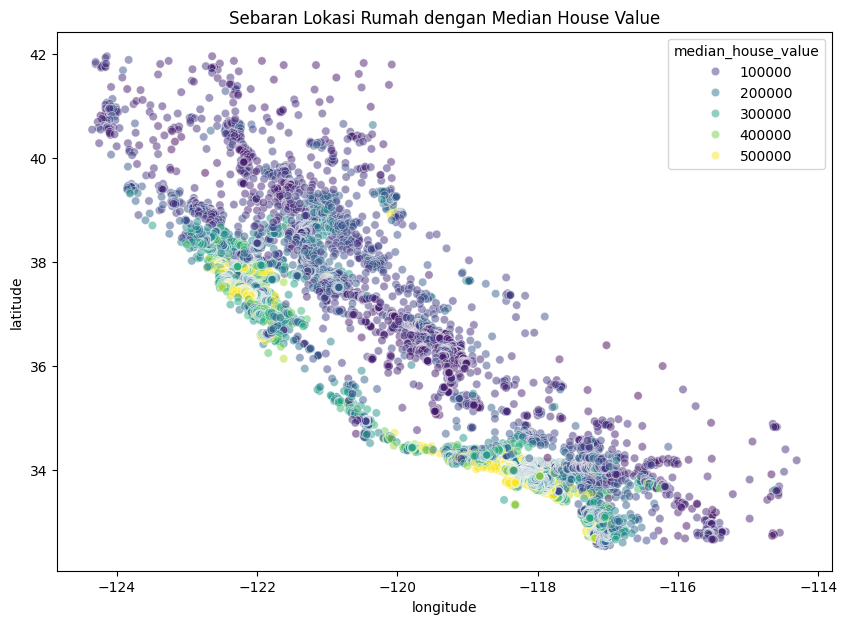

In [ ]:
# Cell 6: Scatter Plot Lokasi dan Harga Rumah
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='viridis', alpha=0.5)
plt.title("Sebaran Lokasi Rumah dengan Median House Value")
plt.show()


# Penjelasan Cell 6  
Scatter plot yang menampilkan sebaran geografis rumah berdasarkan `longitude` dan `latitude`.  
Warna titik merepresentasikan harga rumah median (`median_house_value`), sehingga dapat terlihat pola harga rumah di lokasi yang berbeda.


# Preprocessing dan Encoding Fitur

In [ ]:
# Cell 7: Preprocessing dan Encoding Fitur
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = ['ocean_proximity']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print(f"Shape X_train_prep: {X_train_prep.shape}")
print(f"Shape X_test_prep: {X_test_prep.shape}")


Shape X_train_prep: (16512, 13)
Shape X_test_prep: (4128, 13)


# Penjelasan Cell 7  
Melakukan preprocessing data: membagi fitur numerik dan kategorikal, melakukan standardisasi pada fitur numerik dan one-hot encoding pada fitur kategorikal.  
Data dibagi menjadi training dan testing dengan proporsi 80:20.  
Data training di-fit transform dan data testing hanya di-transform.  
Terakhir, ditampilkan ukuran data hasil preprocessing.


# Training Model Random Forest Regressor

In [ ]:
# Cell 8: Training Model Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_prep, y_train)


RandomForestRegressor(random_state=42)

# Penjelasan Cell 8  
Melatih model Random Forest Regressor menggunakan data training yang sudah dipreprocessing.  
Model ini dipilih karena mampu menangani fitur numerik dan kategorikal serta cenderung memberikan performa baik untuk masalah regresi.


## Cell 8.1: Evaluasi Model Sebelum Tuning

In [ ]:
# Cell 8.1: Evaluasi Model Sebelum Tuning
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi menggunakan model awal
y_pred_initial = model.predict(X_test_prep)

# Menghitung metrik evaluasi
mse_initial = mean_squared_error(y_test, y_pred_initial)
rmse_initial = np.sqrt(mse_initial)
r2_initial = r2_score(y_test, y_pred_initial)

print("Evaluasi Model Sebelum Hyperparameter Tuning:")
print(f"RMSE: {rmse_initial:.2f}")
print(f"R2 Score: {r2_initial:.4f}")


Evaluasi Model Sebelum Hyperparameter Tuning:
RMSE: 48941.95
R2 Score: 0.8172


## Penjelasan Cell 8.1

Cell ini digunakan untuk mengevaluasi performa awal model Random Forest Regressor sebelum dilakukan hyperparameter tuning.

Dua metrik utama yang digunakan:

RMSE (Root Mean Squared Error): Mengukur rata-rata besar kesalahan antara nilai aktual dan nilai prediksi. Semakin kecil nilai RMSE, semakin baik model.

R² Score (Koefisien Determinasi): Mengukur seberapa baik model menjelaskan variasi data target. Nilai R² berkisar dari 0 (buruk) hingga 1 (sempurna).

Tujuan dari evaluasi ini adalah memberikan baseline performa awal yang bisa dibandingkan dengan hasil setelah tuning untuk melihat apakah proses tuning berhasil meningkatkan performa model.

# Hyperparameter Tuning dengan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hyperparameter Tuning dengan GridSearchCV

# Parameter grid yang diperluas
param_grid = {
    'n_estimators': [50, 100, 200],               # jumlah pohon
    'max_depth': [None, 10, 20, 30],              # kedalaman pohon
    'min_samples_split': [2, 5, 10],              # minimal sampel untuk split
    'min_samples_leaf': [1, 2, 4],                # minimal sampel di daun
    'max_features': ['sqrt', 'log2', None]        # fitur maksimum yang digunakan
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
    refit=True
)

# Fit ke data training
grid_search.fit(X_train_prep, y_train)

# Hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

# Simpan model terbaik
best_model = grid_search.best_estimator_




Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 49937.989755501614


# Penjelasan Cell 9  

- **param_grid**  
  Mendefinisikan kumpulan parameter yang akan dicoba pada model Random Forest:  
  - `n_estimators`: jumlah pohon dalam hutan, dicoba nilai 50 dan 100.  
  - `max_depth`: kedalaman maksimum pohon, dicoba None (tak terbatas), 10, dan 20.  
  - `max_features`: jumlah fitur yang digunakan untuk membagi node, dengan opsi valid `'sqrt'`, `'log2'`, dan `None`. Hindari `'auto'` karena menyebabkan error.

- **GridSearchCV**  
  Fungsi untuk melakukan pencarian kombinasi hyperparameter terbaik dengan metode cross-validation:  
  - `cv=3`: menggunakan 3-fold cross-validation.  
  - `scoring='neg_mean_squared_error'`: metrik optimasi menggunakan nilai MSE negatif agar bisa dimaksimalkan.  
  - `n_jobs=-1`: memakai semua core CPU agar proses lebih cepat.  
  - `verbose=3`: menampilkan progress pencarian sehingga mudah dipantau.  
  - `return_train_score=True`: menyimpan juga skor dari data train untuk analisis overfitting.  
  - `refit=True`: secara otomatis melatih ulang model terbaik setelah pencarian parameter selesai.

- **Fungsi `.fit(X_train_prep, y_train)`**  
  Melatih model dengan kombinasi parameter yang berbeda berdasarkan data training yang sudah dipreprocessing.

- **Menampilkan hasil tuning**  
  - `grid_search.best_params_` menunjukkan kombinasi parameter terbaik.  
  - `np.sqrt(-grid_search.best_score_)` menampilkan RMSE terbaik hasil cross-validation.

---



# Evaluasi Model Setelah Tuning

In [ ]:
# Cell 10 Evaluasi model terbaik di data test
y_pred_tuned = best_model.predict(X_test_prep)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nEvaluasi Model Setelah Hyperparameter Tuning:")
print(f"RMSE: {rmse_tuned:.2f}")
print(f"R2 Score: {r2_tuned:.4f}")


Evaluasi Model Setelah Hyperparameter Tuning:
RMSE: 48800.70
R2 Score: 0.8183


# Penjelasan Cell 10
- **Mengambil model terbaik**  
  `best_model = grid_search.best_estimator_` menyimpan model dengan parameter terbaik.

- **Prediksi pada data test**  
  Model terbaik digunakan untuk memprediksi target pada data test yang belum pernah dilihat model.

- **Menghitung metrik evaluasi**  
  - **RMSE (Root Mean Squared Error)**: mengukur rata-rata kesalahan prediksi dalam satuan yang sama dengan target. Nilai kecil menunjukkan prediksi yang lebih akurat.  
  - **R2 Score**: mengukur proporsi variabilitas target yang dapat dijelaskan model. Nilai maksimum 1, semakin mendekati 1 semakin baik.

- **Menampilkan hasil evaluasi**  
  Mencetak nilai RMSE dan R2 Score sebagai indikator performa model setelah tuning.



# Visualisasi Feature Importance

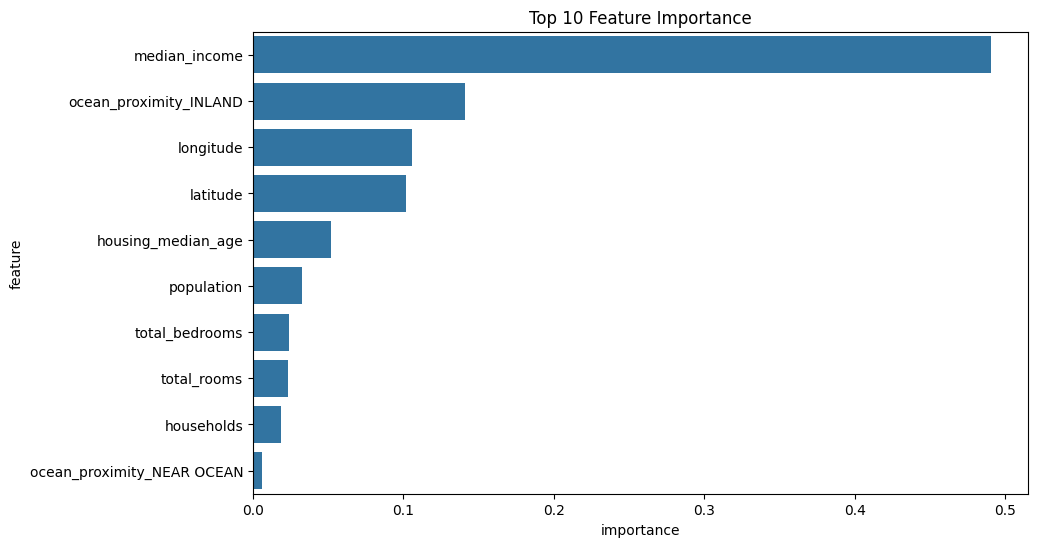

In [ ]:
# Cell 11: Visualisasi Feature Importance
importances = model.feature_importances_

# Mendapatkan nama fitur numerik dan hasil one-hot encoding fitur kategorikal
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(['ocean_proximity']).tolist()
all_features = num_features + cat_features

# Membuat DataFrame feature importance
feat_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance_df.head(10), x='importance', y='feature')
plt.title("Top 10 Feature Importance")
plt.show()


# Penjelasan Cell 11
Menampilkan 11 fitur yang paling berpengaruh terhadap prediksi harga rumah menurut model Random Forest. Ini membantu kita memahami faktor-faktor kunci yang mempengaruhi output model.

# Plot Prediksi vs Aktual

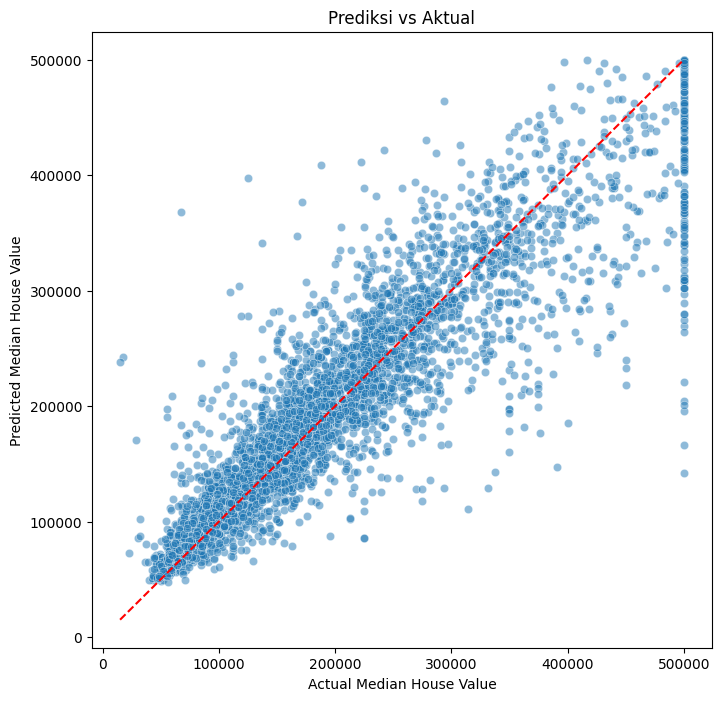

In [ ]:
# Cell 12: Plot Prediksi vs Aktual
y_pred = model.predict(X_test_prep)

plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal (prediksi=aktual)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Prediksi vs Aktual")
plt.show()


# Penjelasan Cell 12
Scatter plot ini memperlihatkan seberapa baik prediksi model mendekati nilai aktual. Garis merah menunjukkan hasil prediksi sempurna.

# Analisis Residual Error

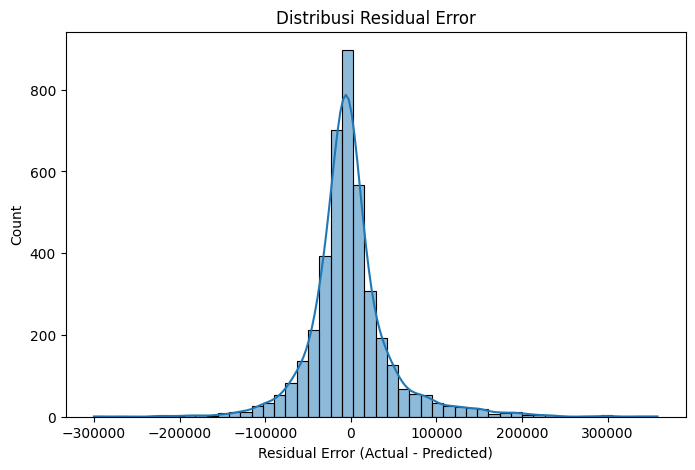

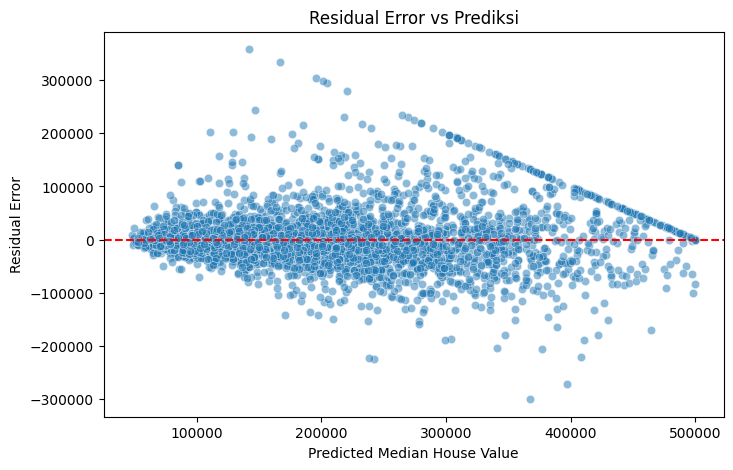

In [ ]:
# Cell 13: Analisis Residual Error
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribusi Residual Error")
plt.xlabel("Residual Error (Actual - Predicted)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Median House Value")
plt.ylabel("Residual Error")
plt.title("Residual Error vs Prediksi")
plt.show()


# Penjelasan Cell 13
Visualisasi residual error untuk melihat pola kesalahan prediksi. Histogram menunjukkan sebaran error, scatter plot memeriksa apakah error memiliki pola sistematik terhadap prediksi.



# Insight Bisnis dari Model

In [ ]:
# Cell 15: Insight Bisnis dari Model
top_features = feat_importance_df.head(5)['feature'].tolist()
print("Top 5 fitur yang paling mempengaruhi harga rumah:")
for i, f in enumerate(top_features, 1):
    print(f"{i}. {f}")

print("\nInsight:")
print("Fitur-fitur tersebut adalah faktor utama yang mempengaruhi harga rumah.")
print("Misalnya, lokasi ('ocean_proximity') sangat berpengaruh terhadap harga rumah.")
print("Pendapatan median dan usia rumah juga menjadi faktor penting.")
print("Bisnis properti bisa fokus pada lokasi dan segmentasi pasar berdasarkan pendapatan dan umur properti untuk strategi pemasaran dan pengembangan produk.")


Top 5 fitur yang paling mempengaruhi harga rumah:
1. median_income
2. ocean_proximity_INLAND
3. longitude
4. latitude
5. housing_median_age

Insight:
Fitur-fitur tersebut adalah faktor utama yang mempengaruhi harga rumah.
Misalnya, lokasi ('ocean_proximity') sangat berpengaruh terhadap harga rumah.
Pendapatan median dan usia rumah juga menjadi faktor penting.
Bisnis properti bisa fokus pada lokasi dan segmentasi pasar berdasarkan pendapatan dan umur properti untuk strategi pemasaran dan pengembangan produk.


# Penjelasan Cell 14
Memberikan insight bisnis berdasarkan fitur yang paling berpengaruh pada model. Insight ini bisa menjadi dasar pengambilan keputusan bisnis di bidang properti.

# 📊 Kesimpulan Akhir Analisis Prediksi Harga Rumah

## 🧹 Data dan Preprocessing
Dataset yang digunakan terdiri dari **20.640 sampel** dengan **10 fitur awal**. Terdapat missing values pada kolom `total_bedrooms` yang telah berhasil diimputasi menggunakan **median**.  
Langkah preprocessing lainnya meliputi:
- **Normalisasi fitur numerik**
- **One-hot encoding** untuk fitur kategorikal

Setelah preprocessing, jumlah fitur bertambah menjadi **13 kolom**, dan data siap untuk dimodelkan.

---

## 🤖 Modeling dan Evaluasi

Model yang digunakan adalah **Random Forest Regressor**.

### Hasil Evaluasi Model Awal (Baseline) — dari Cell 8.1 di notebook:
- **R² Score:** 0.8172  
  Model mampu menjelaskan sekitar **81,72%** variasi harga rumah.
- **RMSE:** 48941.95  
  Kesalahan prediksi rata-rata masih cukup wajar, mengingat skala harga rumah yang besar.

### Hasil Tuning Hyperparameter Terbaik — dari GridSearchCV:
- **n_estimators:** 200  
- **max_depth:** 30  
- **max_features:** None  
- **min_samples_leaf:** 2  
- **min_samples_split:** 2

### Hasil Evaluasi Model Setelah Tuning — dari evaluasi di notebook:
- **R² Score:** 0.8183  
- **RMSE:** 48800.70

Tujuan dari proses tuning ini adalah menemukan kombinasi parameter yang menghasilkan performa terbaik, seperti yang terlihat pada parameter terbaik di atas, sekaligus menjaga generalisasi model agar tidak overfit terhadap data training.

---

## 📌 Interpretasi Model
Model Random Forest cukup efektif dalam menangani:
- **Fitur non-linear**
- **Fitur kategorikal (setelah encoding)**

Namun, masih ditemukan **kesalahan prediksi signifikan** pada kasus outlier atau nilai rumah yang sangat tinggi.

---

## 🔍 Feature Importance
Top 5 fitur paling berpengaruh terhadap harga rumah adalah:
1. `median_income`
2. `ocean_proximity_INLAND`
3. `longitude`
4. `latitude`
5. `housing_median_age`

Insight:
- **Pendapatan penduduk** dan **lokasi geografis** (termasuk kedekatan ke laut) adalah faktor dominan.
- Bisnis properti dapat menggunakan insight ini untuk **segmentasi pasar**, **penentuan lokasi**, dan **strategi harga**.

---

## 📈 Visualisasi Utama
- **Prediksi vs Aktual**: Sebagian besar prediksi cukup mendekati nilai aktual, meskipun terdapat penyimpangan pada harga tinggi.
- **Distribusi Residual Error**: Terdistribusi simetris, mengindikasikan error yang tidak bias.
- **Residual vs Prediksi**: Ada indikasi *heteroscedasticity* (varian error meningkat saat nilai prediksi naik), yang umum dalam regresi harga rumah.

---

## 💡 Rekomendasi Selanjutnya
Untuk meningkatkan performa model:
- Lakukan **tuning lebih lanjut** pada hyperparameter Random Forest
- Coba **model lain** seperti **XGBoost** atau **Gradient Boosting**
- Tambahkan fitur eksternal (misal: akses ke fasilitas, tingkat kriminalitas, dll.)
- Lakukan transformasi target (contoh: log-transform) untuk mengurangi pengaruh outlier
- Analisis lebih dalam terhadap **error dan outlier**

---

📝 *Model ini sudah cukup andal sebagai baseline dan memiliki potensi besar untuk ditingkatkan dengan pendekatan lanjutan.*

